## Face Recognition
As an example for image classification, let's take a look at the facial recognition problem. We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures. A fetcher for the dataset is built into Scikit-Learn:

In [18]:
# Import libs for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Matrix manipulation
import numpy as np

# Functions for perfomance evaluation and for splitting data
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Load dataset of faces
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_lfw_people

In [19]:
faces = fetch_lfw_people(min_faces_per_person=60)
classes = faces.target_names

print('Classes: ',classes)
print('Total classes: ',len(classes))
print('Total images: ',faces.images.shape[0])
print('Image size: ',faces.images[0,:,:].shape)
print('Finished loading.')

Classes:  ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
Total classes:  8
Total images:  1348
Image size:  (62, 47)
Finished loading.


In [23]:
mnist = fetch_openml('mnist_784', cache=True)
classes = [str(val) for val in np.unique(mnist.target.astype('int64'))]

#### Show some images

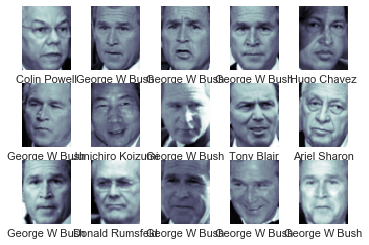

In [2]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

## 1. Build Linear Support Vector Machine

In [37]:
from sklearn.svm import SVC

In [39]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
X = faces.data
y = faces.target
print(X.shape)
print(y.shape)

(1348, 2914)
(1348,)


In [ ]:
# Create model
clf = SVC(kernel='linear', C = 1.0)
print('Model built.')

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=42)
print('Data splitted.')

# Fit model
clf.fit(X_train, y_train)
print('Model trained.')

Model built.
Data splitted.


#### Evaluate performance on test

In [10]:
y_pred = clf.predict(X_test)

# True
print(y_test)
# Prediction
print(y_pred)

[3 3 3 3 3 1 7 0 7 3 3 3 1 3 7 3 1 3 7 5 3 1 4 3 3 0 2 1 3 3 7 3 3 3 4 3 1
 0 1 3 3 0 7 4 7 7 2 1 6 3 5 4 3 2 2 1 1 0 1 1 1 3 2 2 3 6 1 1 4 3 3 4 3 2
 3 2 1 7 3 3 2 4 7 3 1 6 1 7 7 1 3 4 1 2 2 1 1 3 3 1 1 3 1 1 7 3 0 3 0 3 3
 3 0 3 1 1 7 3 0 4 3 0 3 4 3 3 6 3 3 5 2 2 3 1 1 2 3 3 2 4 3 1 6 2 3 3 3 7
 0 1 5 3 3 5 3 4 3 3 7 4 3 3 3 3 1 3 2 3 7 3 5 2 7 3 2 3 6 3 0 4 1 4 6 0 7
 1 1 1 6 3 3 3 7 1 3 3 3 3 4 1 1 3 3 3 5 3 5 1 4 1 3 7 1 6 7 3 3 4 3 3 3 2
 3 5 5 4 0 2 7 3 3 1 4 3 6 2 6 3 5 7 3 3 3 2 7 4 0 4 3 3 0 5 1 3 3 5 1 3 6
 3 5 3 1 3 7 7 3 7 2 7]
[3 3 3 3 3 1 3 0 7 3 3 3 3 3 7 2 1 3 7 5 3 0 4 3 4 3 2 1 3 3 3 3 3 3 7 3 1
 0 1 3 3 0 7 4 3 7 2 2 6 3 5 7 3 3 3 1 1 2 1 1 1 3 2 3 1 6 1 1 6 3 3 4 3 2
 3 2 1 4 3 3 2 4 3 3 1 3 0 7 7 1 3 5 1 3 3 1 1 3 3 3 1 3 0 1 7 3 0 3 0 3 3
 3 0 3 1 3 7 3 0 4 3 0 6 4 3 3 6 3 3 5 2 2 3 1 1 2 3 3 3 2 3 1 6 3 3 3 3 7
 3 1 3 3 3 4 3 4 3 3 0 4 3 3 5 3 1 3 2 3 4 3 6 5 7 3 2 3 6 3 4 4 1 6 6 0 7
 1 1 3 6 2 3 3 7 1 3 3 3 3 4 1 1 3 3 3 5 3 5 1 4 1 3 7 1 6 3 3 3 4 3 3 3 3
 

In [11]:
print(classification_report(y_test, y_pred, target_names=classes))

                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.75      0.75        16
     Colin Powell       0.95      0.81      0.87        47
  Donald Rumsfeld       0.70      0.58      0.64        24
    George W Bush       0.82      0.93      0.87       106
Gerhard Schroeder       0.71      0.68      0.70        22
      Hugo Chavez       0.75      0.64      0.69        14
Junichiro Koizumi       0.69      0.92      0.79        12
       Tony Blair       0.83      0.69      0.75        29

         accuracy                           0.81       270
        macro avg       0.78      0.75      0.76       270
     weighted avg       0.81      0.81      0.80       270



Text(92.68, 0.5, 'True Label')

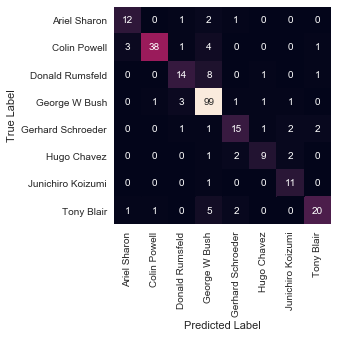

In [13]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## 2. Build Linear Support Tensor Machine

In [25]:
import pystmm

In [26]:
X = mnist.data.astype('float32').reshape(mnist.data.shape[0],28,28)
y = mnist.target.astype('int64')
X.shape, y.shape

((70000, 28, 28), (70000,))

In [36]:
len(y[y==5]), len(y[y==6])

(6313, 6876)

In [15]:
X = faces.images
y = faces.target
print(X.shape)
print(y.shape)

(1348, 62, 47)
(1348,)


In [28]:
# Create model
clf = pystmm.classifier.STMM(typemulticlassifier='ovr',C1=1.0, C2=1.0, maxIter=2, tolSTM=1e-2, penalty = 'l2', dual = True, tol=1e-2,loss = 'squared_hinge', maxIterSVM=100000)
print('Model built.')

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=42)
print('Data splitted.')

# Fit model
clf.fit(X_train, y_train)
print('Model trained.')

maxIter  2
ovr 1.0 1.0 2 0.01 l2 True 0.01 squared_hinge 100000
Model built.
Data splitted.
1 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


2 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


2 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


2 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


2 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


2 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


2 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


2 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


2 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


2 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


2 / 2


c:\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Model trained.


c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
y_pred = clf.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1381
           1       0.82      0.92      0.87      1575
           2       0.68      0.67      0.67      1398
           3       0.62      0.70      0.66      1428
           4       0.65      0.51      0.57      1365
           5       0.50      0.32      0.39      1262
           6       0.75      0.82      0.78      1375
           7       0.67      0.82      0.73      1459
           8       0.72      0.59      0.65      1365
           9       0.50      0.50      0.50      1392

    accuracy                           0.67     14000
   macro avg       0.66      0.66      0.66     14000
weighted avg       0.66      0.67      0.66     14000



Text(92.68, 0.5, 'True Label')

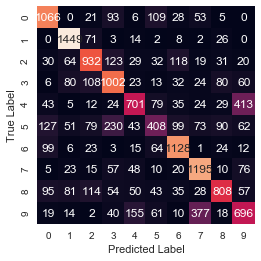

In [32]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')